In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
img = plt.imread('imageCamera.png')

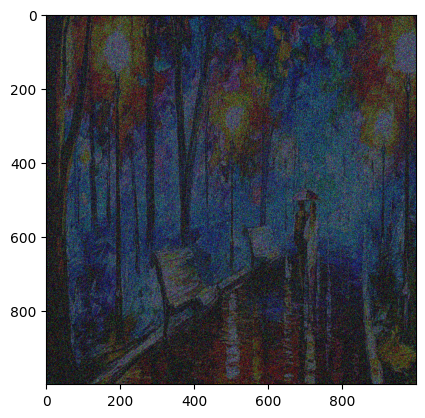

In [28]:
plt.imshow(img)
plt.show()

In [29]:
gray = np.zeros(shape=(img.shape[0], img.shape[1]))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        gray[i][j] = np.mean(img[i][j])/255

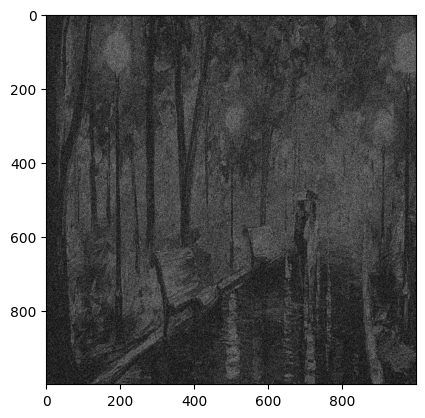

In [30]:
plt.imshow(gray, cmap="gray")
plt.show()

In [31]:
# noise_matrix = np.random.normal(scale=0.2/255, size=(img.shape[0], img.shape[1]))

In [32]:
# noisy_image = gray + noise_matrix

In [33]:
# plt.imshow(noisy_image, cmap="gray")
# plt.show()

In [34]:
def convolve(image, kernel):
    img_width = image.shape[0]
    img_height = image.shape[1]
    kernel_shape = kernel.shape
    
    out_width = img_width - kernel_shape[0] + 1
    out_height = img_height - kernel_shape[1] + 1
    output = np.zeros((out_width, out_height))
    
    for y in range(img_height):
        if y > img_height - kernel_shape[1]:
            break
        for x in range(img_width):
            if x > img_width - kernel_shape[0]:
                break
            try:
                output[x, y] = (kernel * image[
                    x:x+kernel_shape[0],
                    y:y+kernel_shape[1]
                ]).sum()
            except:
                break
    
    return output
    

In [35]:
blurred = convolve(gray, np.ones(shape=(5, 5)) / 49)

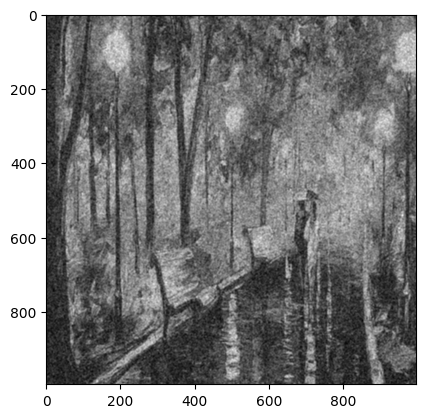

In [41]:
plt.imshow(blurred, cmap="gray")
plt.savefig('gray.png')
plt.show()

In [37]:
horizontal_kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1],
])
horizontal_edges = convolve(blurred, horizontal_kernel)

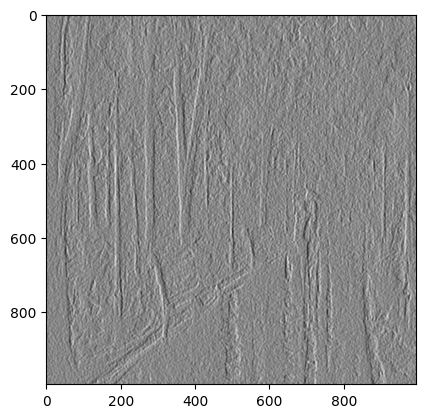

In [42]:
plt.imshow(horizontal_edges, cmap="gray")
plt.savefig("horizontal_edges.png")
plt.show()

In [43]:
vertical_kernel = np.array([
    [+1, +1, +1],
    [ 0,  0,  0],
    [-1, -1, -1],
])
vertical_edges = convolve(blurred, vertical_kernel)

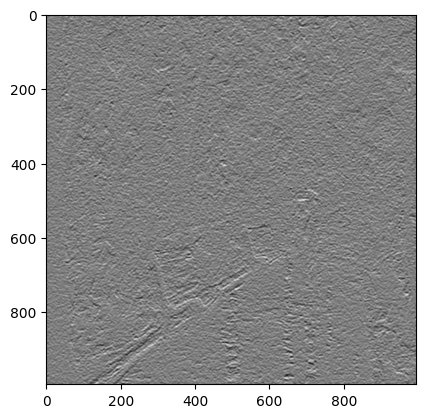

In [44]:
plt.imshow(vertical_edges, cmap="gray")
plt.savefig("vertical_edges.png")
plt.show()